In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [2]:
data=np.array(data)
m,n = data.shape
data_test = data[0:1000].T
y_test = data_test[0]
x_test = data_test[1:n]
x_test = x_test/255

data_train = data[1000:m].T
y_train = data_train[0]
x_train = data_train[1:n]
x_train = x_train/255
_,m_train = x_train.shape

In [3]:
def init_pm():
    w1=np.random.randn(10,784)*0.05
    b1=np.random.randn(10,1)*0.05
    w2=np.random.randn(10,10)*0.05
    b2=np.random.randn(10,1)*0.05
    return w1,b1,w2,b2
def relu(z):
    return np.maximum(z,0)
def softmax(z):
    exp = np.exp(z - np.max(z)) 
    return exp / exp.sum(axis=0)
def forward_prop(w1,b1,w2,b2,x):
    z1 = w1.dot(x) + b1
    a1 = relu(z1)
    z2 = w2.dot(a1) + b2
    a2= softmax(z2)
    return z1,a1,z2,a2
def drelu(z):
    return z> 0
def one_hot(y):
    one_hot_y = np.zeros((y.size,y.max()+1))
    one_hot_y[np.arange(y.size),y]=1
    one_hot_y = one_hot_y.T
    return one_hot_y

def backward_prop(x,one_hot_y,a1,z1,a2,z2,w1,b1,w2,b2):
    dz2 = 2*(a2-one_hot_y)
    dw2 = (dz2.dot(a1.T))/m
    db2 = np.sum(dz2)/m
    dz1 = (w2.T).dot(dz2)*drelu(z1)
    dw1 = (dz1.dot(x.T))/m
    db1= np.sum(dz1)/m
    return dw1,db1,dw2,db2
def update_pm(w1,b1,w2,b2,dw1,db1,dw2,db2,a):
    w2 = w2-a*dw2
    b2= b2-a*db2
    w1=w1-a*dw1
    b1=b1-a*db1
    return w1,b1,w2,b2
def get_predictions(a2):
    return np.argmax(a2,0)
def accuracy(predictions,y):
    print(predictions, y)
    return np.sum(predictions==y)/y.size
def gd(x,y,a,iterations):
    w1,b1,w2,b2 = init_pm()
    one_hot_y = one_hot(y)
    for i in range(iterations):
        z1,a1,z2,a2 = forward_prop(w1,b1,w2,b2,x)
        dw1,db1,dw2,db2 = backward_prop(x,one_hot_y,a1,z1,a2,z2,w1,b1,w2,b2)
        w1,b1,w2,b2 = update_pm(w1,b1,w2,b2,dw1,db1,dw2,db2,a)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(a2)
            print(accuracy(predictions, y))
    return w1, b1, w2, b2

In [4]:
w1,b1,w2,b2 = gd(x_train,y_train,0.1,500)

Iteration:  0
[4 1 4 ... 1 1 1] [1 5 1 ... 7 6 9]
0.0721951219512195
Iteration:  10
[1 0 1 ... 0 1 1] [1 5 1 ... 7 6 9]
0.2952682926829268
Iteration:  20
[1 0 1 ... 0 0 9] [1 5 1 ... 7 6 9]
0.37782926829268293
Iteration:  30
[1 0 1 ... 7 6 9] [1 5 1 ... 7 6 9]
0.5691951219512195
Iteration:  40
[1 6 1 ... 7 6 9] [1 5 1 ... 7 6 9]
0.6850731707317074
Iteration:  50
[1 2 1 ... 7 6 4] [1 5 1 ... 7 6 9]
0.7379756097560976
Iteration:  60
[1 8 1 ... 7 6 4] [1 5 1 ... 7 6 9]
0.7692682926829268
Iteration:  70
[1 8 1 ... 7 6 4] [1 5 1 ... 7 6 9]
0.7936341463414635
Iteration:  80
[1 8 1 ... 7 6 9] [1 5 1 ... 7 6 9]
0.8113658536585366
Iteration:  90
[1 8 1 ... 7 6 9] [1 5 1 ... 7 6 9]
0.8266585365853658
Iteration:  100
[1 8 1 ... 7 6 9] [1 5 1 ... 7 6 9]
0.8384634146341463
Iteration:  110
[1 8 1 ... 7 6 9] [1 5 1 ... 7 6 9]
0.8482926829268292
Iteration:  120
[1 8 1 ... 7 6 9] [1 5 1 ... 7 6 9]
0.8560975609756097
Iteration:  130
[1 8 1 ... 7 6 9] [1 5 1 ... 7 6 9]
0.8623414634146341
Iteration:  140


Prediction:  [1]
Label:  1


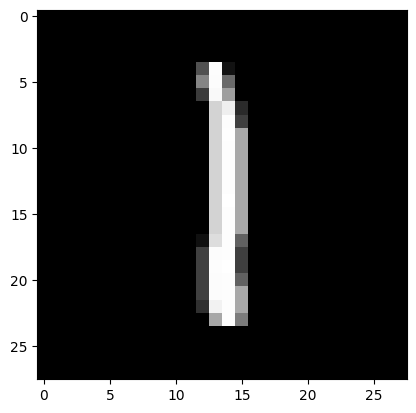

Prediction:  [8]
Label:  5


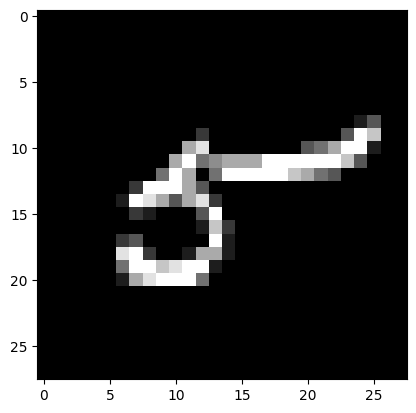

Prediction:  [1]
Label:  1


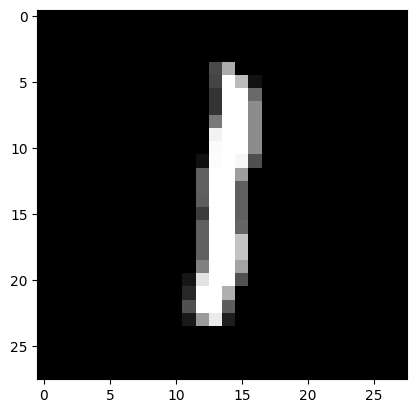

Prediction:  [7]
Label:  7


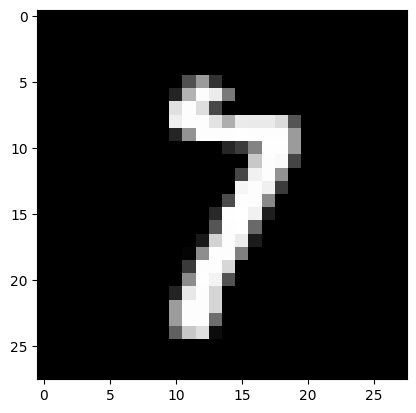

Prediction:  [7]
Label:  7


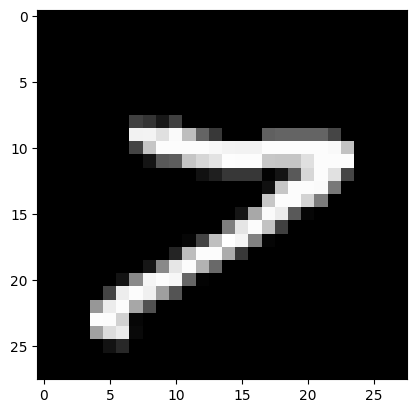

Prediction:  [9]
Label:  9


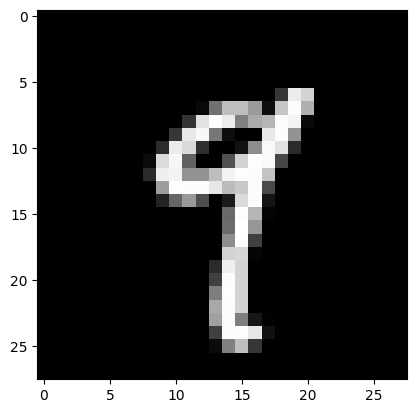

Prediction:  [6]
Label:  6


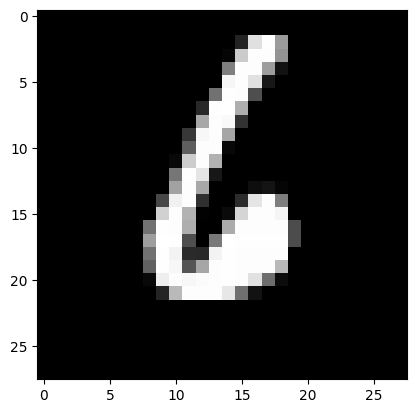

Prediction:  [0]
Label:  0


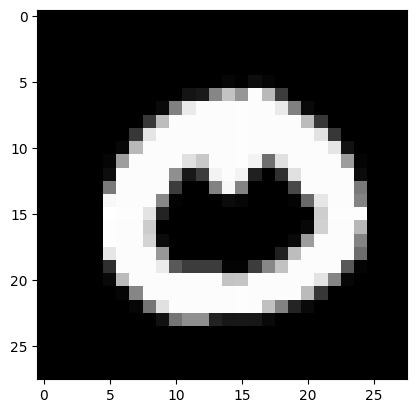

In [5]:
def make_predictions(x,w1,b1,w2,b2):
    _, _, _, a2 = forward_prop(w1,b1,w2,b2,x)
    predictions = get_predictions(a2)
    return predictions

def test_prediction(index, w1, b1, w2, b2):
    current_image = x_train[:, index, None]
    prediction = make_predictions(x_train[:, index, None], w1, b1, w2, b2)
    label = y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) *255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()
    
test_prediction(0, w1, b1, w2, b2)
test_prediction(1, w1, b1, w2, b2)
test_prediction(2, w1, b1, w2, b2)
test_prediction(3, w1, b1, w2, b2)
test_prediction(100, w1, b1, w2, b2)
test_prediction(101, w1, b1, w2, b2)
test_prediction(202, w1, b1, w2, b2)
test_prediction(303, w1, b1, w2, b2)